In [121]:
import pandas as pd 
import numpy as np
import sklearn as skl
import pickle as pk
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.preprocessing as MinMaxScaler
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv("NC_natural_gas_consumption_analysis.csv")
df.head(10)

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Cooling_Degree_Days_POW2,Heating Degree Days,Heating_Degree_Days_POW2,...,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
0,Jan-09,33360,14881.0,8960.0,7722.0,1798.0,0.0,0.0,443.0,196160.0,...,0,0,0,0,0,0,0,0,0,0
1,Feb-09,26215,10616.0,6565.0,7121.0,1912.0,0.0,0.0,317.0,100616.0,...,0,0,0,0,0,0,0,0,0,0
2,Mar-09,24096,8259.0,5670.0,7493.0,2674.0,6.0,37.0,253.0,64043.0,...,1,0,0,0,0,0,0,0,0,0
3,Apr-09,14130,3243.0,3161.0,6412.0,1314.0,23.0,537.0,96.0,9184.0,...,0,1,0,0,0,0,0,0,0,0
4,May-09,11754,1315.0,2464.0,6215.0,1761.0,102.0,10486.0,23.0,514.0,...,0,0,1,0,0,0,0,0,0,0
5,Jun-09,13141,754.0,1853.0,6053.0,4481.0,201.0,40562.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
6,Jul-09,14301,962.0,1983.0,6052.0,5303.0,220.0,48253.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
7,Aug-09,17248,947.0,2064.0,6300.0,7937.0,245.0,59894.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
8,Sep-09,17018,1128.0,2450.0,6337.0,7103.0,104.0,10802.0,6.0,39.0,...,0,0,0,0,0,0,1,0,0,0
9,Oct-09,14783,2760.0,3598.0,7166.0,1259.0,13.0,180.0,109.0,11976.0,...,0,0,0,0,0,0,0,1,0,0


# exploratory data analysis

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 27 columns):
Date                        90 non-null object
_Total NC Natural Gas       77 non-null object
_Residential Natural Gas    77 non-null float64
_Commercial Natural Gas     77 non-null float64
_Industrial Natural Gas     78 non-null float64
_Electric Natural Gas       78 non-null float64
Cooling Degree Days         78 non-null float64
Cooling_Degree_Days_POW2    78 non-null float64
Heating Degree Days         78 non-null float64
Heating_Degree_Days_POW2    78 non-null float64
Mean Maximum Temp           78 non-null float64
Mean MinimumTemp            78 non-null float64
Mean Temp                   78 non-null float64
Trend                       90 non-null int64
Month                       90 non-null object
Month_EQ__01                90 non-null int64
Month_EQ__02                90 non-null int64
Month_EQ__03                90 non-null int64
Month_EQ__04                90 non-null int6

In [124]:
df.count()

Date                        90
_Total NC Natural Gas       77
_Residential Natural Gas    77
_Commercial Natural Gas     77
_Industrial Natural Gas     78
_Electric Natural Gas       78
Cooling Degree Days         78
Cooling_Degree_Days_POW2    78
Heating Degree Days         78
Heating_Degree_Days_POW2    78
Mean Maximum Temp           78
Mean MinimumTemp            78
Mean Temp                   78
Trend                       90
Month                       90
Month_EQ__01                90
Month_EQ__02                90
Month_EQ__03                90
Month_EQ__04                90
Month_EQ__05                90
Month_EQ__06                90
Month_EQ__07                90
Month_EQ__08                90
Month_EQ__09                90
Month_EQ__10                90
Month_EQ__11                90
Month_EQ__12                90
dtype: int64

In [125]:
df[['Mean MinimumTemp','Mean Temp']].corr()

,Mean MinimumTemp,Mean Temp
Mean MinimumTemp,1.00000,0.99596
Mean Temp,0.99596,1.00000


In [126]:
df[['Mean Maximum Temp','Mean Temp']].corr()

,Mean Maximum Temp,Mean Temp
Mean Maximum Temp,1.000000,0.995903
Mean Temp,0.995903,1.000000


In [127]:
df[['Cooling Degree Days','Heating Degree Days']].corr()

,Cooling Degree Days,Heating Degree Days
Cooling Degree Days,1.00000,-0.74524
Heating Degree Days,-0.74524,1.00000


In [128]:
df.corr()

,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Cooling_Degree_Days_POW2,Heating Degree Days,Heating_Degree_Days_POW2,Mean Maximum Temp,Mean MinimumTemp,...,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
_Residential Natural Gas,1.000000,0.989805,0.666806,-0.120048,-0.683428,-0.545476,0.991421,0.978343,-0.941391,-0.923499,...,0.136340,-0.162132,-0.245462,-0.270114,-0.248310,-0.246908,-0.243059,-0.173205,0.125085,0.369986
_Commercial Natural Gas,0.989805,1.000000,0.696258,-0.077745,-0.696562,-0.569232,0.982694,0.974507,-0.941878,-0.922533,...,0.133309,-0.173571,-0.240426,-0.273508,-0.268642,-0.244951,-0.227116,-0.102139,0.103800,0.331471
_Industrial Natural Gas,0.666806,0.696258,1.000000,0.398252,-0.609474,-0.530014,0.670478,0.591891,-0.687780,-0.685155,...,0.247864,-0.093100,-0.166710,-0.262616,-0.263678,-0.171515,-0.201646,0.023689,0.121335,0.223901
_Electric Natural Gas,-0.120048,-0.077745,0.398252,1.000000,0.283232,0.259445,-0.170226,-0.112730,0.210641,0.233250,...,-0.066096,-0.082564,0.033820,0.163275,0.174571,0.126970,0.025481,-0.143996,-0.099447,-0.000762
Cooling Degree Days,-0.683428,-0.696562,-0.609474,0.283232,1.000000,0.961800,-0.745240,-0.583589,0.876207,0.902256,...,-0.241329,-0.176282,0.079260,0.425866,0.537260,0.432108,0.135091,-0.174384,-0.234685,-0.235183
Cooling_Degree_Days_POW2,-0.545476,-0.569232,-0.530014,0.259445,0.961800,1.000000,-0.602597,-0.458259,0.768431,0.790806,...,-0.199239,-0.191529,-0.058242,0.381468,0.621901,0.419308,0.007707,-0.178100,-0.184210,-0.184210
Heating Degree Days,0.991421,0.982694,0.670478,-0.170226,-0.745240,-0.602597,1.000000,0.957343,-0.967997,-0.955168,...,0.166009,-0.133703,-0.260723,-0.300180,-0.276473,-0.276183,-0.265458,-0.114143,0.168774,0.368787
Heating_Degree_Days_POW2,0.978343,0.974507,0.591891,-0.112730,-0.583589,-0.458259,0.957343,1.000000,-0.884442,-0.855683,...,0.057003,-0.191825,-0.223241,-0.225792,-0.207587,-0.207587,-0.207408,-0.171986,0.057333,0.361672
Mean Maximum Temp,-0.941391,-0.941878,-0.687780,0.210641,0.876207,0.768431,-0.967997,-0.884442,1.000000,0.987346,...,-0.179273,0.053044,0.202391,0.379395,0.386096,0.326767,0.214041,0.024188,-0.195330,-0.349586
Mean MinimumTemp,-0.923499,-0.922533,-0.685155,0.233250,0.902256,0.790806,-0.955168,-0.855683,0.987346,1.000000,...,-0.210071,-0.002105,0.194916,0.364573,0.401425,0.372075,0.248802,0.002258,-0.220806,-0.308858


In [129]:
df.isnull().sum()

Date                         0
_Total NC Natural Gas       13
_Residential Natural Gas    13
_Commercial Natural Gas     13
_Industrial Natural Gas     12
_Electric Natural Gas       12
Cooling Degree Days         12
Cooling_Degree_Days_POW2    12
Heating Degree Days         12
Heating_Degree_Days_POW2    12
Mean Maximum Temp           12
Mean MinimumTemp            12
Mean Temp                   12
Trend                        0
Month                        0
Month_EQ__01                 0
Month_EQ__02                 0
Month_EQ__03                 0
Month_EQ__04                 0
Month_EQ__05                 0
Month_EQ__06                 0
Month_EQ__07                 0
Month_EQ__08                 0
Month_EQ__09                 0
Month_EQ__10                 0
Month_EQ__11                 0
Month_EQ__12                 0
dtype: int64

In [130]:
df.mean()

_Residential Natural Gas     5766.506494
_Commercial Natural Gas      4582.636364
_Industrial Natural Gas      8300.038462
_Electric Natural Gas       11432.717949
Cooling Degree Days            79.487179
Cooling_Degree_Days_POW2    15637.782051
Heating Degree Days           158.961538
Heating_Degree_Days_POW2    52818.705128
Mean Maximum Temp              21.487179
Mean MinimumTemp                9.769231
Mean Temp                      15.679487
Trend                         141.500000
Month_EQ__01                    0.088889
Month_EQ__02                    0.088889
Month_EQ__03                    0.088889
Month_EQ__04                    0.088889
Month_EQ__05                    0.088889
Month_EQ__06                    0.088889
Month_EQ__07                    0.077778
Month_EQ__08                    0.077778
Month_EQ__09                    0.077778
Month_EQ__10                    0.077778
Month_EQ__11                    0.077778
Month_EQ__12                    0.077778
dtype: float64

In [131]:
db=df.drop(['Date'],axis=1)
db

,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Cooling_Degree_Days_POW2,Heating Degree Days,Heating_Degree_Days_POW2,Mean Maximum Temp,...,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
0,33360,14881.0,8960.0,7722.0,1798.0,0.0,0.0,443.0,196160.0,9.0,...,0,0,0,0,0,0,0,0,0,0
1,26215,10616.0,6565.0,7121.0,1912.0,0.0,0.0,317.0,100616.0,13.0,...,0,0,0,0,0,0,0,0,0,0
2,24096,8259.0,5670.0,7493.0,2674.0,6.0,37.0,253.0,64043.0,16.0,...,1,0,0,0,0,0,0,0,0,0
3,14130,3243.0,3161.0,6412.0,1314.0,23.0,537.0,96.0,9184.0,23.0,...,0,1,0,0,0,0,0,0,0,0
4,11754,1315.0,2464.0,6215.0,1761.0,102.0,10486.0,23.0,514.0,26.0,...,0,0,1,0,0,0,0,0,0,0
5,13141,754.0,1853.0,6053.0,4481.0,201.0,40562.0,0.0,0.0,31.0,...,0,0,0,1,0,0,0,0,0,0
6,14301,962.0,1983.0,6052.0,5303.0,220.0,48253.0,0.0,0.0,31.0,...,0,0,0,0,1,0,0,0,0,0
7,17248,947.0,2064.0,6300.0,7937.0,245.0,59894.0,0.0,0.0,32.0,...,0,0,0,0,0,1,0,0,0,0
8,17018,1128.0,2450.0,6337.0,7103.0,104.0,10802.0,6.0,39.0,27.0,...,0,0,0,0,0,0,1,0,0,0
9,14783,2760.0,3598.0,7166.0,1259.0,13.0,180.0,109.0,11976.0,21.0,...,0,0,0,0,0,0,0,1,0,0


# Missing Value Analysis

In [132]:
db=df.fillna(df.mean())
db

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Cooling_Degree_Days_POW2,Heating Degree Days,Heating_Degree_Days_POW2,...,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
0,Jan-09,33360,14881.000000,8960.000000,7722.000000,1798.000000,0.000000,0.000000,443.000000,196160.000000,...,0,0,0,0,0,0,0,0,0,0
1,Feb-09,26215,10616.000000,6565.000000,7121.000000,1912.000000,0.000000,0.000000,317.000000,100616.000000,...,0,0,0,0,0,0,0,0,0,0
2,Mar-09,24096,8259.000000,5670.000000,7493.000000,2674.000000,6.000000,37.000000,253.000000,64043.000000,...,1,0,0,0,0,0,0,0,0,0
3,Apr-09,14130,3243.000000,3161.000000,6412.000000,1314.000000,23.000000,537.000000,96.000000,9184.000000,...,0,1,0,0,0,0,0,0,0,0
4,May-09,11754,1315.000000,2464.000000,6215.000000,1761.000000,102.000000,10486.000000,23.000000,514.000000,...,0,0,1,0,0,0,0,0,0,0
5,Jun-09,13141,754.000000,1853.000000,6053.000000,4481.000000,201.000000,40562.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
6,Jul-09,14301,962.000000,1983.000000,6052.000000,5303.000000,220.000000,48253.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
7,Aug-09,17248,947.000000,2064.000000,6300.000000,7937.000000,245.000000,59894.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
8,Sep-09,17018,1128.000000,2450.000000,6337.000000,7103.000000,104.000000,10802.000000,6.000000,39.000000,...,0,0,0,0,0,0,1,0,0,0
9,Oct-09,14783,2760.000000,3598.000000,7166.000000,1259.000000,13.000000,180.000000,109.000000,11976.000000,...,0,0,0,0,0,0,0,1,0,0


In [133]:
db.describe(include=['object','bool'])

,Date,_Total NC Natural Gas,Month
count,90,77,90
unique,90,77,12
top,Feb-12,38021,_03
freq,1,1,8


# Data visulization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017DADBA8>,
      dtype=object)

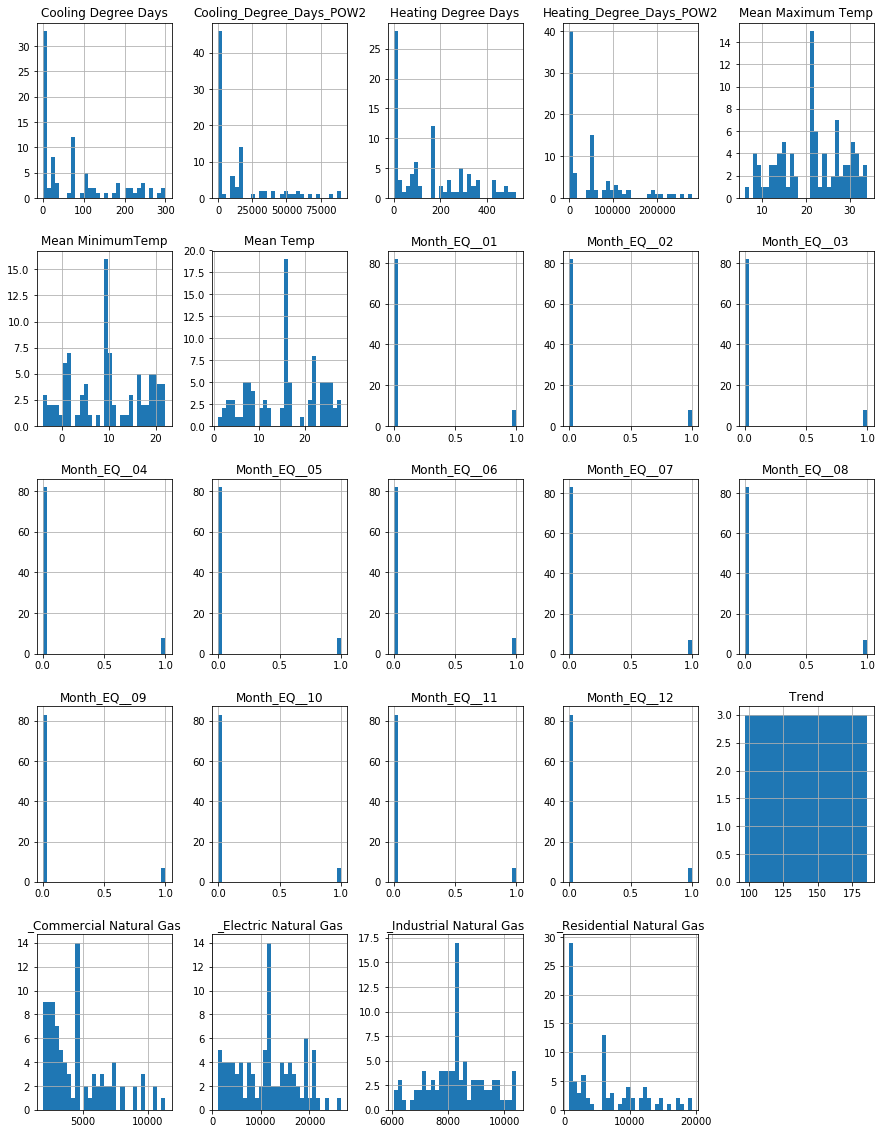

In [134]:
db.hist(bins=30,figsize=(15,20))

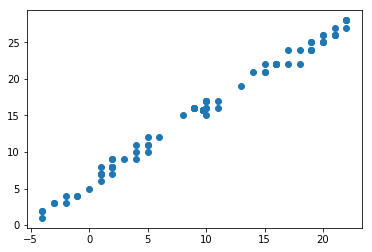

In [135]:
plt.scatter(db['Mean MinimumTemp'],db['Mean Temp'])

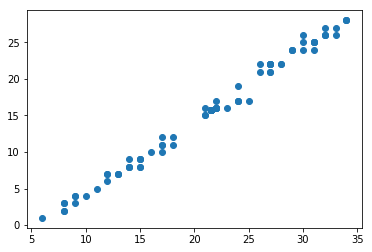

In [136]:
plt.scatter(db['Mean Maximum Temp'],db['Mean Temp'])

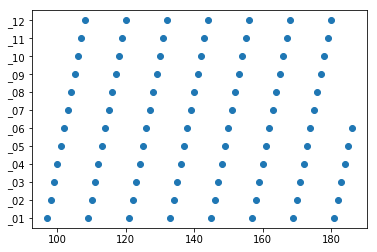

In [137]:
plt.scatter(db['Trend'],db['Month'])

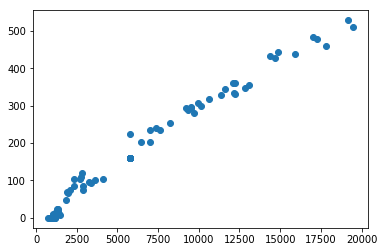

In [138]:
plt.scatter(db['_Residential Natural Gas'],db['Heating Degree Days'])

# Drop Highly correlation variable

In [139]:
db.drop(['_Residential Natural Gas','Mean Maximum Temp','Mean MinimumTemp','Heating_Degree_Days_POW2','Cooling_Degree_Days_POW2'],axis=1)

,Date,_Total NC Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Heating Degree Days,Mean Temp,Trend,Month,...,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
0,Jan-09,33360,8960.000000,7722.000000,1798.000000,0.000000,443.000000,4.000000,97,_01,...,0,0,0,0,0,0,0,0,0,0
1,Feb-09,26215,6565.000000,7121.000000,1912.000000,0.000000,317.000000,7.000000,98,_02,...,0,0,0,0,0,0,0,0,0,0
2,Mar-09,24096,5670.000000,7493.000000,2674.000000,6.000000,253.000000,10.000000,99,_03,...,1,0,0,0,0,0,0,0,0,0
3,Apr-09,14130,3161.000000,6412.000000,1314.000000,23.000000,96.000000,16.000000,100,_04,...,0,1,0,0,0,0,0,0,0,0
4,May-09,11754,2464.000000,6215.000000,1761.000000,102.000000,23.000000,21.000000,101,_05,...,0,0,1,0,0,0,0,0,0,0
5,Jun-09,13141,1853.000000,6053.000000,4481.000000,201.000000,0.000000,25.000000,102,_06,...,0,0,0,1,0,0,0,0,0,0
6,Jul-09,14301,1983.000000,6052.000000,5303.000000,220.000000,0.000000,25.000000,103,_07,...,0,0,0,0,1,0,0,0,0,0
7,Aug-09,17248,2064.000000,6300.000000,7937.000000,245.000000,0.000000,26.000000,104,_08,...,0,0,0,0,0,1,0,0,0,0
8,Sep-09,17018,2450.000000,6337.000000,7103.000000,104.000000,6.000000,22.000000,105,_09,...,0,0,0,0,0,0,1,0,0,0
9,Oct-09,14783,3598.000000,7166.000000,1259.000000,13.000000,109.000000,15.000000,106,_10,...,0,0,0,0,0,0,0,1,0,0


# outlier Detection

In [147]:
outlier=db[(np.abs(db['Mean Temp']-db['Mean Temp'].mean())>(3*db['Mean Temp'].std()))]
outlier

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Cooling_Degree_Days_POW2,Heating Degree Days,Heating_Degree_Days_POW2,...,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12


# Inlier Detection

In [148]:
inlier=db[(np.abs(db['Mean Temp']-db['Mean Temp'].mean())<(3*db['Mean Temp'].std()))]
inlier

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Cooling_Degree_Days_POW2,Heating Degree Days,Heating_Degree_Days_POW2,...,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
0,Jan-09,33360,14881.000000,8960.000000,7722.000000,1798.000000,0.000000,0.000000,443.000000,196160.000000,...,0,0,0,0,0,0,0,0,0,0
1,Feb-09,26215,10616.000000,6565.000000,7121.000000,1912.000000,0.000000,0.000000,317.000000,100616.000000,...,0,0,0,0,0,0,0,0,0,0
2,Mar-09,24096,8259.000000,5670.000000,7493.000000,2674.000000,6.000000,37.000000,253.000000,64043.000000,...,1,0,0,0,0,0,0,0,0,0
3,Apr-09,14130,3243.000000,3161.000000,6412.000000,1314.000000,23.000000,537.000000,96.000000,9184.000000,...,0,1,0,0,0,0,0,0,0,0
4,May-09,11754,1315.000000,2464.000000,6215.000000,1761.000000,102.000000,10486.000000,23.000000,514.000000,...,0,0,1,0,0,0,0,0,0,0
5,Jun-09,13141,754.000000,1853.000000,6053.000000,4481.000000,201.000000,40562.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
6,Jul-09,14301,962.000000,1983.000000,6052.000000,5303.000000,220.000000,48253.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
7,Aug-09,17248,947.000000,2064.000000,6300.000000,7937.000000,245.000000,59894.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
8,Sep-09,17018,1128.000000,2450.000000,6337.000000,7103.000000,104.000000,10802.000000,6.000000,39.000000,...,0,0,0,0,0,0,1,0,0,0
9,Oct-09,14783,2760.000000,3598.000000,7166.000000,1259.000000,13.000000,180.000000,109.000000,11976.000000,...,0,0,0,0,0,0,0,1,0,0


# categorial variable Treatment

In [151]:
gas=inlier[['Month_EQ__03','Month_EQ__04','Month_EQ__05','Month_EQ__06','Month_EQ__07','Month_EQ__08','Month_EQ__09','Month_EQ__10','Month_EQ__11','Month_EQ__12']]
category = pd.get_dummies(gas)
category.head()

,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [158]:
feature = inlier[['Date','_Total NC Natural Gas ','_Residential Natural Gas','_Commercial Natural Gas','_Industrial Natural Gas','_Electric Natural Gas','Cooling Degree Days','Heating Degree Days']].join(category)
feature.head()

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Heating Degree Days,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
0,Jan-09,33360,14881.0,8960.0,7722.0,1798.0,0.0,443.0,0,0,0,0,0,0,0,0,0,0
1,Feb-09,26215,10616.0,6565.0,7121.0,1912.0,0.0,317.0,0,0,0,0,0,0,0,0,0,0
2,Mar-09,24096,8259.0,5670.0,7493.0,2674.0,6.0,253.0,1,0,0,0,0,0,0,0,0,0
3,Apr-09,14130,3243.0,3161.0,6412.0,1314.0,23.0,96.0,0,1,0,0,0,0,0,0,0,0
4,May-09,11754,1315.0,2464.0,6215.0,1761.0,102.0,23.0,0,0,1,0,0,0,0,0,0,0


In [159]:
 shuffled_indices = np.random.permutation(len(feature))

In [160]:
ds=int(len(db)*0.2)

In [161]:
test_indices = shuffled_indices[:ds]
test = feature.iloc[test_indices]
test

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Heating Degree Days,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
4,May-09,11754,1315.000000,2464.000000,6215.000000,1761.000000,102.000000,23.000000,0,0,1,0,0,0,0,0,0,0
40,May-12,24744,1452.000000,2205.000000,8008.000000,13077.000000,119.000000,8.000000,0,0,1,0,0,0,0,0,0,0
39,Apr-12,24502,2349.000000,3370.000000,8003.000000,10778.000000,22.000000,103.000000,0,1,0,0,0,0,0,0,0,0
5,Jun-09,13141,754.000000,1853.000000,6053.000000,4481.000000,201.000000,0.000000,0,0,0,1,0,0,0,0,0,0
35,Dec-11,32941,9506.000000,6081.000000,8758.000000,8594.000000,0.000000,297.000000,0,0,0,0,0,0,0,0,0,1
68,Sep-14,31839,1158.000000,2884.000000,8138.000000,19655.000000,120.000000,8.000000,0,0,0,0,0,0,1,0,0,0
69,Oct-14,27255,2083.000000,3606.000000,8946.000000,12618.000000,31.000000,74.000000,0,0,0,0,0,0,0,1,0,0
12,Jan-10,39947,17239.000000,9701.000000,8409.000000,4595.000000,0.000000,479.000000,0,0,0,0,0,0,0,0,0,0
87,Apr-16,NaN,5766.506494,4582.636364,8300.038462,11432.717949,79.487179,158.961538,0,1,0,0,0,0,0,0,0,0
6,Jul-09,14301,962.000000,1983.000000,6052.000000,5303.000000,220.000000,0.000000,0,0,0,0,1,0,0,0,0,0


In [162]:
test_indices = shuffled_indices[:ds]
test = feature.iloc[test_indices]
test

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Heating Degree Days,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
4,May-09,11754,1315.000000,2464.000000,6215.000000,1761.000000,102.000000,23.000000,0,0,1,0,0,0,0,0,0,0
40,May-12,24744,1452.000000,2205.000000,8008.000000,13077.000000,119.000000,8.000000,0,0,1,0,0,0,0,0,0,0
39,Apr-12,24502,2349.000000,3370.000000,8003.000000,10778.000000,22.000000,103.000000,0,1,0,0,0,0,0,0,0,0
5,Jun-09,13141,754.000000,1853.000000,6053.000000,4481.000000,201.000000,0.000000,0,0,0,1,0,0,0,0,0,0
35,Dec-11,32941,9506.000000,6081.000000,8758.000000,8594.000000,0.000000,297.000000,0,0,0,0,0,0,0,0,0,1
68,Sep-14,31839,1158.000000,2884.000000,8138.000000,19655.000000,120.000000,8.000000,0,0,0,0,0,0,1,0,0,0
69,Oct-14,27255,2083.000000,3606.000000,8946.000000,12618.000000,31.000000,74.000000,0,0,0,0,0,0,0,1,0,0
12,Jan-10,39947,17239.000000,9701.000000,8409.000000,4595.000000,0.000000,479.000000,0,0,0,0,0,0,0,0,0,0
87,Apr-16,NaN,5766.506494,4582.636364,8300.038462,11432.717949,79.487179,158.961538,0,1,0,0,0,0,0,0,0,0
6,Jul-09,14301,962.000000,1983.000000,6052.000000,5303.000000,220.000000,0.000000,0,0,0,0,1,0,0,0,0,0


In [163]:
train_indices = shuffled_indices[ds:]
train_indices

array([67, 36, 63, 55, 64,  3, 41, 48, 54, 16, 32, 89, 50,  9, 72, 88, 31,
       25, 65, 27, 34, 45, 33,  0, 59, 43, 23, 80, 20,  1, 60,  2, 30, 24,
       11, 61, 37, 47,  8, 86, 76, 77, 18, 83, 62, 71, 52, 22, 10, 44, 70,
       79, 56, 28, 38, 53, 84,  7, 66, 78, 14, 21, 82, 49, 57, 17, 42, 19,
       81, 75, 73, 29])

In [164]:
train = feature.iloc[train_indices]
train

,Date,_Total NC Natural Gas,_Residential Natural Gas,_Commercial Natural Gas,_Industrial Natural Gas,_Electric Natural Gas,Cooling Degree Days,Heating Degree Days,Month_EQ__03,Month_EQ__04,Month_EQ__05,Month_EQ__06,Month_EQ__07,Month_EQ__08,Month_EQ__09,Month_EQ__10,Month_EQ__11,Month_EQ__12
67,Aug-14,32577,997.000000,2708.000000,8245.000000,20625.000000,185.000000,0.000000,0,0,0,0,0,1,0,0,0,0
36,Jan-12,40964,13091.000000,8072.000000,9703.000000,10096.000000,0.000000,354.000000,0,0,0,0,0,0,0,0,0,0
63,Apr-14,30975,3347.000000,3372.000000,8882.000000,15371.000000,15.000000,93.000000,0,1,0,0,0,0,0,0,0,0
55,Aug-13,31664,1011.000000,2611.000000,8535.000000,19504.000000,185.000000,1.000000,0,0,0,0,0,1,0,0,0,0
64,May-14,29591,1349.000000,3314.000000,8333.000000,16592.000000,99.000000,18.000000,0,0,1,0,0,0,0,0,0,0
3,Apr-09,14130,3243.000000,3161.000000,6412.000000,1314.000000,23.000000,96.000000,0,1,0,0,0,0,0,0,0,0
41,Jun-12,24432,1135.000000,2433.000000,7571.000000,13291.000000,159.000000,1.000000,0,0,0,1,0,0,0,0,0,0
48,Jan-13,45430,12218.000000,6935.000000,10322.000000,15951.000000,0.000000,361.000000,0,0,0,0,0,0,0,0,0,0
54,Jul-13,31548,1119.000000,2613.000000,8200.000000,19612.000000,230.000000,0.000000,0,0,0,0,1,0,0,0,0,0
16,May-10,16336,1252.000000,2389.000000,6905.000000,5787.000000,124.000000,15.000000,0,0,1,0,0,0,0,0,0,0


In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 67 to 29
Data columns (total 18 columns):
Date                        72 non-null object
_Total NC Natural Gas       62 non-null object
_Residential Natural Gas    72 non-null float64
_Commercial Natural Gas     72 non-null float64
_Industrial Natural Gas     72 non-null float64
_Electric Natural Gas       72 non-null float64
Cooling Degree Days         72 non-null float64
Heating Degree Days         72 non-null float64
Month_EQ__03                72 non-null int64
Month_EQ__04                72 non-null int64
Month_EQ__05                72 non-null int64
Month_EQ__06                72 non-null int64
Month_EQ__07                72 non-null int64
Month_EQ__08                72 non-null int64
Month_EQ__09                72 non-null int64
Month_EQ__10                72 non-null int64
Month_EQ__11                72 non-null int64
Month_EQ__12                72 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage:

In [192]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 4 to 13
Data columns (total 18 columns):
Date                        18 non-null object
_Total NC Natural Gas       15 non-null object
_Residential Natural Gas    18 non-null float64
_Commercial Natural Gas     18 non-null float64
_Industrial Natural Gas     18 non-null float64
_Electric Natural Gas       18 non-null float64
Cooling Degree Days         18 non-null float64
Heating Degree Days         18 non-null float64
Month_EQ__03                18 non-null int64
Month_EQ__04                18 non-null int64
Month_EQ__05                18 non-null int64
Month_EQ__06                18 non-null int64
Month_EQ__07                18 non-null int64
Month_EQ__08                18 non-null int64
Month_EQ__09                18 non-null int64
Month_EQ__10                18 non-null int64
Month_EQ__11                18 non-null int64
Month_EQ__12                18 non-null int64
dtypes: float64(6), int64(10), object(2)
memory usage: 

# Calculate RMSE 

In [165]:
from sklearn.linear_model import LinearRegression

In [183]:
lin_reg = LinearRegression()
lin_reg.fit(train.drop(['Date','_Total NC Natural Gas ','_Residential Natural Gas'],axis=1),train['_Residential Natural Gas'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [185]:
lin_reg.coef_

array([ 7.47081319e-01, -7.73913561e-03,  6.11271871e-03,  4.44894333e+00,
        2.36172678e+01, -2.08433296e+02,  5.24583168e+01, -1.53865239e+02,
       -2.82304175e+02, -3.93620532e+02, -3.02350914e+02, -4.41378491e+01,
       -9.59438350e+02, -3.47165700e+02,  1.05864577e+02])

In [186]:
lin_reg.intercept_

-1526.4567629859366

In [200]:
prediction = lin_reg.predict(test.drop(['Date','_Total NC Natural Gas ','_Residential Natural Gas'],axis=1))

In [201]:
from sklearn.metrics import mean_squared_error

In [202]:
mean_square = mean_squared_error(prediction,test['_Residential Natural Gas'])
root_mean_square = np.sqrt(mean_square)
root_mean_square

545.0009647450089

# Using Lasso 

In [204]:
from sklearn.linear_model import Lasso

In [205]:
regressor= Lasso(random_state=0,alpha=16)
regressor.fit(train.drop(['Date','_Total NC Natural Gas ','_Residential Natural Gas'],axis=1),train['_Residential Natural Gas'])

Lasso(alpha=16, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [206]:
pred_lasso=regressor.predict(test.drop(['Date','_Total NC Natural Gas ','_Residential Natural Gas'],axis=1))

In [208]:
mean_square = mean_squared_error(pred_lasso,test['_Residential Natural Gas'])
root_mean_square = np.sqrt(mean_square)
root_mean_square

539.9431854243574

# using ridge 

In [210]:
from sklearn.linear_model import Ridge

In [211]:
regressor= Ridge(random_state=0,alpha=16)
regressor.fit(train.drop(['Date','_Total NC Natural Gas ','_Residential Natural Gas'],axis=1),train['_Residential Natural Gas'])

Ridge(alpha=16, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [214]:
pred_Ridge=regressor.predict(test.drop(['Date','_Total NC Natural Gas ','_Residential Natural Gas'],axis=1))

In [215]:
mean_square = mean_squared_error(pred_Ridge,test['_Residential Natural Gas'])
root_mean_square = np.sqrt(mean_square)
root_mean_square

541.6024808811909